In [2]:
import pandas as pd
import numpy as np

https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

In [3]:
ratings = pd.read_csv("Ratings.csv", sep=',', on_bad_lines='skip', encoding='latin-1')
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [4]:
books = pd.read_csv("Books.csv", sep=',', on_bad_lines='skip', encoding='latin-1')
books.head()

C:\Users\manik\AppData\Local\Temp\ipykernel_8224\3423032512.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv", sep=',', on_bad_lines='skip', encoding='latin-1')


ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [5]:
users = pd.read_csv("Users.csv", sep=',', on_bad_lines='skip', encoding='latin-1')
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [6]:
print(ratings.shape)
print(books.shape)
print(users.shape)

(1149780, 3)
(271360, 8)
(278858, 3)


In [7]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [8]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L']]

In [9]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [10]:
books.rename(columns={'Book-Title':'title',
                      'Book-Author':'author',
                      "Year-Of-Publication":'year',
                      "Publisher":'publisher',
                      "Image-URL-L":"image_url"},inplace=True)

In [11]:
books.head()

ISBN                                              title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 author  year                   publisher  \
0    Mark P. O. Morford  2002     Oxford University Press   
1  Richard Bruce Wright  2001       HarperFlamingo Canada   
2          Carlo D'Este  1991             HarperPerennial   
3      Gina Bari Kolata  1999        Farrar Straus Giroux   
4       E. J. W. Barber  1999  W. W. Norton &amp; Company   

                                           image_url  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [12]:
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [13]:
users.describe()

User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
users.rename(columns={"User-ID":"user_id",
                      "Location":'location',
                      'Age':'age'},inplace=True)

In [16]:
users.head()

user_id                            location   age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [17]:
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [19]:
ratings.describe()

User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01

In [20]:
ratings.rename(columns={"User-ID":'user_id',
                        'Book-Rating':'rating'},inplace=True)

In [21]:
ratings.head()

user_id        ISBN  rating
0   276725  034545104X       0
1   276726  0155061224       5
2   276727  0446520802       0
3   276729  052165615X       3
4   276729  0521795028       6

In [22]:
print(ratings.shape,books.shape,users.shape,sep='\n')

(1149780, 3)
(271360, 6)
(278858, 3)


<Axes: xlabel='user_id'>

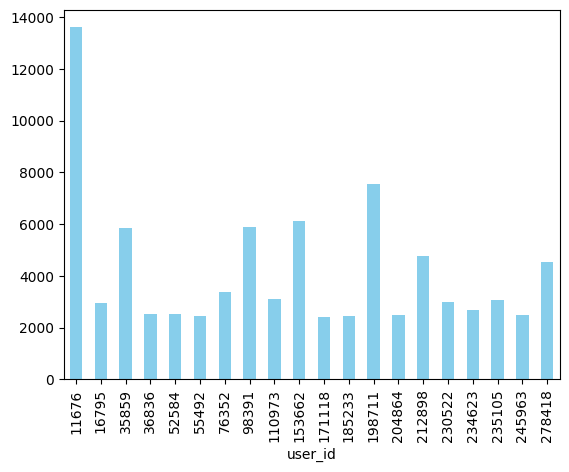

In [23]:
# top 20 users who have consumed books
ratings['user_id'].value_counts().nlargest(20).sort_index().plot(kind='bar', color='skyblue')

In [24]:
ratings.shape

(1149780, 3)

In [25]:
# considering the users who just rated more than 200 movies
x = ratings['user_id'].value_counts() > 200
y = x[x].index

In [26]:
x[x].shape

(899,)

In [ ]:
ratings = ratings[ratings['user_id'].isin(y)]

In [28]:
ratings.head()

user_id        ISBN  rating
1456   277427  002542730X      10
1457   277427  0026217457       0
1458   277427  003008685X       8
1459   277427  0030615321       0
1460   277427  0060002050       0

In [29]:
ratings_with_books = pd.merge(ratings,books,on='ISBN')

In [30]:
ratings_with_books.head()

user_id        ISBN  rating  \
0   277427  002542730X      10   
1   277427  0026217457       0   
2   277427  003008685X       8   
3   277427  0030615321       0   
4   277427  0060002050       0   

                                               title                 author  \
0  Politically Correct Bedtime Stories: Modern Ta...      James Finn Garner   
1                 Vegetarian Times Complete Cookbook             Lucy  Moll   
2                                           Pioneers  James Fenimore Cooper   
3   Ask for May, Settle for June (A Doonesbury book)          G. B. Trudeau   
4                  On a Wicked Dawn (Cynster Novels)      Stephanie Laurens   

   year                  publisher  \
0  1994  John Wiley &amp; Sons Inc   
1  1995      John Wiley &amp; Sons   
2  1974           Thomson Learning   
3  1982        Henry Holt &amp; Co   
4  2002                 Avon Books   

                                           image_url  
0  http://images.amazon.com/images/P/002542730X.0...  
1  http://images.amazon.com/images/P/0026217457.0...  
2  http://images.amazon.com/images/P/003008685X.0...  
3  http://images.amazon.com/images/P/0030615321.0...  
4  http://images.amazon.com/images/P/0060002050.0...

In [31]:
number_ratings = ratings_with_books.groupby('title')['rating'].count().reset_index(name='num_of_rating')

In [32]:
number_ratings.head()

title  num_of_rating
0   A Light in the Storm: The Civil War Diary of ...              2
1                              Always Have Popsicles              1
2               Apple Magic (The Collector's series)              1
3   Beyond IBM: Leadership Marketing and Finance ...              1
4   Clifford Visita El Hospital (Clifford El Gran...              1

In [33]:
final_ratings = pd.merge(ratings_with_books,number_ratings,on='title')

In [34]:
final_ratings.head()

user_id        ISBN  rating  \
0   277427  002542730X      10   
1   277427  0026217457       0   
2   277427  003008685X       8   
3   277427  0030615321       0   
4   277427  0060002050       0   

                                               title                 author  \
0  Politically Correct Bedtime Stories: Modern Ta...      James Finn Garner   
1                 Vegetarian Times Complete Cookbook             Lucy  Moll   
2                                           Pioneers  James Fenimore Cooper   
3   Ask for May, Settle for June (A Doonesbury book)          G. B. Trudeau   
4                  On a Wicked Dawn (Cynster Novels)      Stephanie Laurens   

   year                  publisher  \
0  1994  John Wiley &amp; Sons Inc   
1  1995      John Wiley &amp; Sons   
2  1974           Thomson Learning   
3  1982        Henry Holt &amp; Co   
4  2002                 Avon Books   

                                           image_url  num_of_rating  
0  http://images.amazon.com/images/P/002542730X.0...             82  
1  http://images.amazon.com/images/P/0026217457.0...              7  
2  http://images.amazon.com/images/P/003008685X.0...              1  
3  http://images.amazon.com/images/P/0030615321.0...              1  
4  http://images.amazon.com/images/P/0060002050.0...             13

In [35]:
#  considering the books which have got atleast 50 ratings
final_ratings = final_ratings[final_ratings['num_of_rating']>=50]

In [36]:
final_ratings.head()

user_id        ISBN  rating  \
0    277427  002542730X      10   
13   277427  0060930535       0   
15   277427  0060934417       0   
18   277427  0061009059       9   
24   277427  006440188X       0   

                                                title  \
0   Politically Correct Bedtime Stories: Modern Ta...   
13                      The Poisonwood Bible: A Novel   
15                                 Bel Canto: A Novel   
18  One for the Money (Stephanie Plum Novels (Pape...   
24                                  The Secret Garden   

                     author  year                  publisher  \
0         James Finn Garner  1994  John Wiley &amp; Sons Inc   
13       Barbara Kingsolver  1999                  Perennial   
15             Ann Patchett  2002                  Perennial   
18          Janet Evanovich  1995                HarperTorch   
24  Frances Hodgson Burnett  1998               HarperTrophy   

                                            image_url  num_of_rating  
0   http://images.amazon.com/images/P/002542730X.0...             82  
13  http://images.amazon.com/images/P/0060930535.0...            133  
15  http://images.amazon.com/images/P/0060934417.0...            108  
18  http://images.amazon.com/images/P/0061009059.0...            108  
24  http://images.amazon.com/images/P/006440188X.0...             79

In [37]:
final_ratings.drop_duplicates(subset=['user_id','title'],inplace=True)

In [38]:
final_ratings.head()

user_id        ISBN  rating  \
0    277427  002542730X      10   
13   277427  0060930535       0   
15   277427  0060934417       0   
18   277427  0061009059       9   
24   277427  006440188X       0   

                                                title  \
0   Politically Correct Bedtime Stories: Modern Ta...   
13                      The Poisonwood Bible: A Novel   
15                                 Bel Canto: A Novel   
18  One for the Money (Stephanie Plum Novels (Pape...   
24                                  The Secret Garden   

                     author  year                  publisher  \
0         James Finn Garner  1994  John Wiley &amp; Sons Inc   
13       Barbara Kingsolver  1999                  Perennial   
15             Ann Patchett  2002                  Perennial   
18          Janet Evanovich  1995                HarperTorch   
24  Frances Hodgson Burnett  1998               HarperTrophy   

                                            image_url  num_of_rating  
0   http://images.amazon.com/images/P/002542730X.0...             82  
13  http://images.amazon.com/images/P/0060930535.0...            133  
15  http://images.amazon.com/images/P/0060934417.0...            108  
18  http://images.amazon.com/images/P/0061009059.0...            108  
24  http://images.amazon.com/images/P/006440188X.0...             79

In [39]:
final_ratings.isnull().sum()

user_id          0
ISBN             0
rating           0
title            0
author           0
year             0
publisher        0
image_url        0
num_of_rating    0
dtype: int64

In [40]:
#creating pivot table
book_pivot = final_ratings.pivot_table(columns='user_id',index='title',values='rating')

In [41]:
book_pivot

user_id                                             254     2276    2766    \
title                                                                        
1984                                                   9.0     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN    10.0     NaN   
4 Blondes                                              NaN     NaN     NaN   
84 Charing Cross Road                                  NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

user_id                                             2977    3363    3757    \
title                                                                        
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     NaN     NaN   
84 Charing Cross Road                                  NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     0.0     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

user_id                                             4017    4385    6242    \
title                                                                        
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     NaN     NaN   
84 Charing Cross Road                                  NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     7.0   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

user_id                                             6251    ...  274004  \
title                                                       ...           
1984                                                   NaN  ...     NaN   
1st to Die: A Novel                                    NaN  ...     NaN   
2nd Chance                                             NaN  ...     NaN   
4 Blondes                                              0.0  ...     NaN   
84 Charing Cross Road                                  NaN  ...     NaN   
...                                                    ...  ...     ...   
Year of Wonders                                        NaN  ...     NaN   
You Belong To Me                                       NaN  ...     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     NaN   
Zoya                                                   NaN  ...     NaN   
\O\" Is for Outlaw"                                    

In [42]:
book_pivot.fillna(0,inplace=True)

In [43]:
book_pivot

user_id                                             254     2276    2766    \
title                                                                        
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             2977    3363    3757    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             4017    4385    6242    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
84 Charing Cross Road                                  0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     7.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

user_id                                             6251    ...  274004  \
title                                                       ...           
1984                                                   0.0  ...     0.0   
1st to Die: A Novel                                    0.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
84 Charing Cross Road                                  0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

In [44]:
from scipy.sparse import csc_matrix

In [45]:
book_sparse = csc_matrix(book_pivot)

In [46]:
book_sparse

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 14961 stored elements and shape (742, 888)>

In [47]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [48]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [49]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1),n_neighbors=6)

In [50]:
distance

array([[ 0.        , 67.75691847, 68.05145112, 72.277244  , 75.81556568,
        76.30203143]])

In [51]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [52]:
book_names = book_pivot.index

In [58]:
np.where(book_pivot.index=='Harry Potter and the Goblet of Fire (Book 4)')[0][0]

np.int64(238)

In [66]:
ids = np.where(final_ratings['title'] == 'Harry Potter and the Goblet of Fire (Book 4)')[0][0]


In [67]:
final_ratings.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg'

In [74]:
suggestion[0]

array([237, 238, 240, 241, 184, 536])

In [75]:
book_name = []
for  book_id in suggestion[0]:
    book_name.append(book_pivot.index[book_id])

In [76]:
book_name[0]

'Harry Potter and the Chamber of Secrets (Book 2)'

In [77]:
ids_index = []
for name in book_name:
    ids = np.where(final_ratings['title']==name)[0][0]
    ids_index.append(ids)


In [84]:
img_urls = []
for idx in ids_index:
    url = final_ratings.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg


In [89]:
import pickle
pickle.dump(model, open('artifacts/model.pkl','wb'))
pickle.dump(book_names,open('artifacts/book_names.pkl','wb'))
pickle.dump(final_ratings,open('artifacts/final_ratings.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

# Testing 

array([237, 238, 240, 241, 184, 536])

In [92]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index==book_name)[0][0]
    distance,suggestion = model.kneighbours(book_pivot.iloc[book_id:].values.reshape(1,-1),n_neighbours=6)
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            if j == book_name:
                print(f"You searched '{book_name}'\n")
                print("The suggestion books are : \n")
            else:
                print(j)